### Import libraries


In [17]:
#Load libraries

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

### Load and Preprocess data

In [18]:

# Open the image file
image_path = 'fish\Bacterial diseases - Aeromoniasis/Bacterial diseases - Aeromoniasis (1).jpg'
image = Image.open(image_path)

# Get the size (width, height) of the image
image_size = image.size
print(f"Image size: {image_size}")


Image size: (224, 224)


In [19]:
# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [20]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(0 if class_name == 'Healthy Fish' else 1)


# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

fish\Bacterial diseases - Aeromoniasis
fish\Bacterial gill disease


fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


In [21]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
num_classes = 2  # Healthy and Sick
labels = to_categorical(labels, num_classes)

In [23]:
# Split the data into training, validation, and test sets
x_train, x, y_train, y = train_test_split(data, labels, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 2) 
The shape of validation data :(46, 128, 128, 3),(46, 2) 
The shape of test data :(46, 128, 128, 3),(46, 2) 


### Create a Model

In [24]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.3),
    Dense(num_classes, activation='sigmoid')
])



In [25]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [26]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 128)      

### Train the model

In [27]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


12/12 [==============================] - 14s 875ms/step - loss: 0.7810 - accuracy: 0.5516 - val_loss: 0.6622 - val_accuracy: 0.7174
Epoch 2/10
12/12 [==============================] - 9s 728ms/step - loss: 0.6692 - accuracy: 0.6114 - val_loss: 0.6331 - val_accuracy: 0.6522
Epoch 3/10
12/12 [==============================] - 10s 800ms/step - loss: 0.6084 - accuracy: 0.6875 - val_loss: 0.5495 - val_accuracy: 0.7174
Epoch 4/10
12/12 [==============================] - 11s 906ms/step - loss: 0.5458 - accuracy: 0.7446 - val_loss: 0.7556 - val_accuracy: 0.5435
Epoch 5/10
12/12 [==============================] - 10s 839ms/step - loss: 0.5129 - accuracy: 0.7228 - val_loss: 0.5099 - val_accuracy: 0.7391
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 0.4184 - accuracy: 0.8152 - val_loss: 0.4404 - val_accuracy: 0.7826
Epoch 7/10
12/12 [==============================] - 14s 1s/step - loss: 0.2963 - accuracy: 0.8886 - val_loss: 1.1006 - val_accuracy: 0.6087
Epoch 8/10
12/12 

### Visualize the model performance

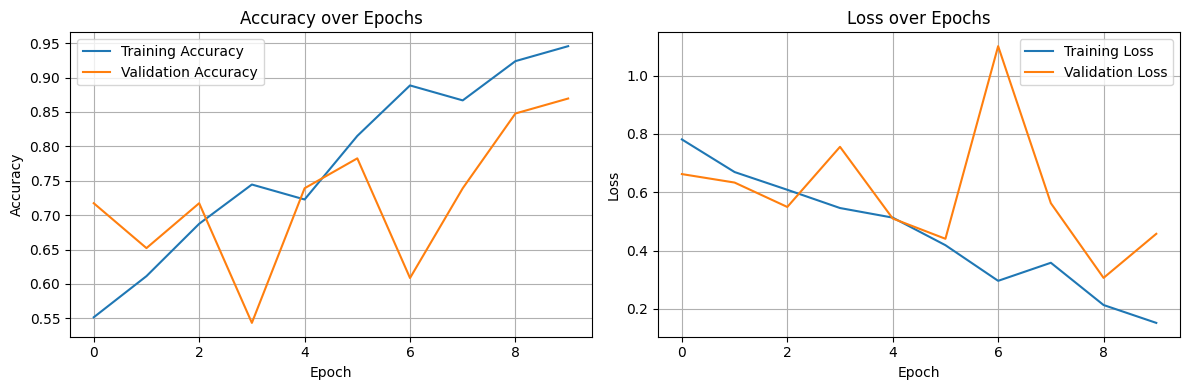

In [28]:
plt.figure(figsize=(12, 4))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


### Evaluate on the test set

In [29]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

2/2 [==============================] - 0s 108ms/step - loss: 0.3677 - accuracy: 0.8696
Test Accuracy: 0.87
Test Loss: 0.37


In [30]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

2/2 [==============================] - 1s 149ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.87      0.93      0.90        29

    accuracy                           0.87        46
   macro avg       0.87      0.85      0.86        46
weighted avg       0.87      0.87      0.87        46



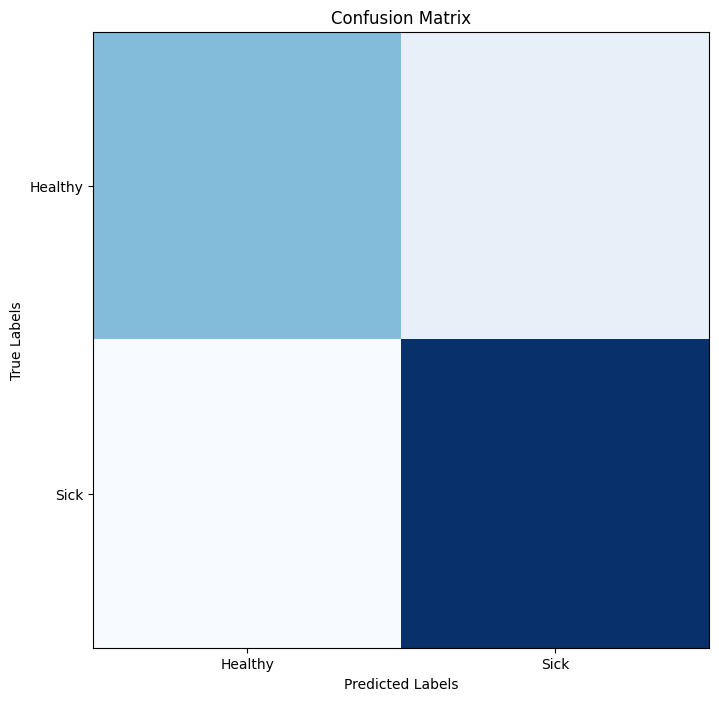

In [31]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Frågor:


### • Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.

### • Har du använt någon databehandling? Varför?


### • Utvärdera modellens prestanda.

### • Är prestandan bra? Varför/ varför inte?

### • Vad hade du kunnat göra för att förbättra den ytterligare?